# Ford GoBike System  Dataset Exploration
## by Mohd Tamimi

> This document explores a dataset that contains information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

> I will answer questions like: 
> When are most trips taken in terms
of time of day, day of the week, or
month of the year?
How long does the average trip
take?
Does the above depend on if a user
is a subscriber or customer?



# Table of contents
1.[Preliminary Wrangling](#Wrangling)

2.[Univariate Exploration](#Univariate)

3.[Bivariate Exploration](#Bivariate)

4.[Multivariate Exploration](#Multivariate)


<a id = "Wrangling"> </a>
# Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bike.shape)

(183412, 16)


In [4]:
print(bike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
print(bike.head(10))

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

In [6]:
len(bike['bike_id'].unique())

4646

In [7]:
# creating one new coulmn to define the route as 'start station' to 'end station'
bike['route'] = 'from: ' + bike['start_station_name'] + 'to: ' + bike['end_station_name']

In [8]:
# creating new coulmns to define the start year, month, & day of the ride
bike['start_year'] = bike['start_time'].str.slice(0,4)
bike['start_month'] = bike['start_time'].str.slice(5,7)
bike['start_day'] = bike['start_time'].str.slice(8,10)
bike['start_hour'] = bike['start_time'].str.slice(11,13)

In [9]:
# creating new coulmns to define the end year, month, & day of the ride
bike['end_year'] = bike['end_time'].str.slice(0,4)
bike['end_month'] = bike['end_time'].str.slice(5,7)
bike['end_day'] = bike['end_time'].str.slice(8,10)
bike['end_hour'] = bike['end_time'].str.slice(11,13)

In [10]:
# Calculate rider's age 
bike['age']= 2019 - bike['member_birth_year']

In [11]:
# Convert the start_day & start_hour to integers 
bike['start_day'] = bike['start_day'].astype('int64')
bike['start_hour'] = bike['start_hour'].astype('int64')

In [12]:
# create a coulmn to show if the day is weekend or weekday
bike['day_type'] = bike['start_day']
bike['day_type'].replace(to_replace = [1,2,8,9,15,16,22,23],value='week_end', inplace=True)
bike['day_type'].replace(to_replace = [3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,28],value='week_day', inplace=True)

In [13]:
# create a coulmn to show the age range
d = {range(1, 29): 'young', range(30, 59): 'middle', range(60, 115): 'senior'}
bike['age_range'] = bike['age'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
bike['age_range'].replace(to_replace = 0, value= 'unknown', inplace=True)

In [14]:
# export the dataframe to a CSV file
bike.to_csv("bike_clean",index=False)

### What is the structure of your dataset?

> There are 183,412 rides in the dataset on 4,646 unique bikes. each ride has 16 features describing either the ride it self like the time, start point, end point of the ride. or describing the rider in terms of gender, age, or type. some variables are numeric, some are dates, and remaining are text.

### What is/are the main feature(s) of interest in your dataset?

> I am mostly intreseted in drawing some conclusions on the riders behaviours like the peak riding time, the rides durations, the favourites routes, and see the difference in these behaviours for different rider's gender, age, or type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the riders behaviour will depend strongly on the time of day, day of the week, & month of the year, I expect that this behaviour will vary for  different for different rider's gender, age, or type. 

<a id = "Univariate"> </a>
# Univariate Exploration

> 1) rides durations  
> I'll start by looking at the distribution of the 1st variable of interest: rides durations.

In [15]:
bike['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

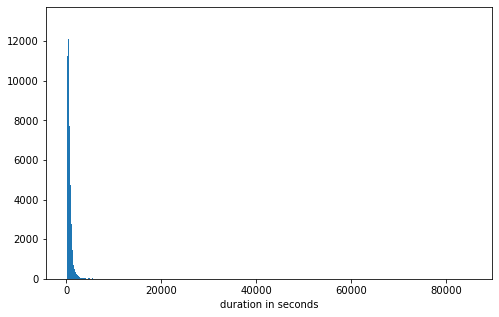

In [16]:
binsize = 50
bins = np.arange(0, bike['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xlabel('duration in seconds')
plt.show()

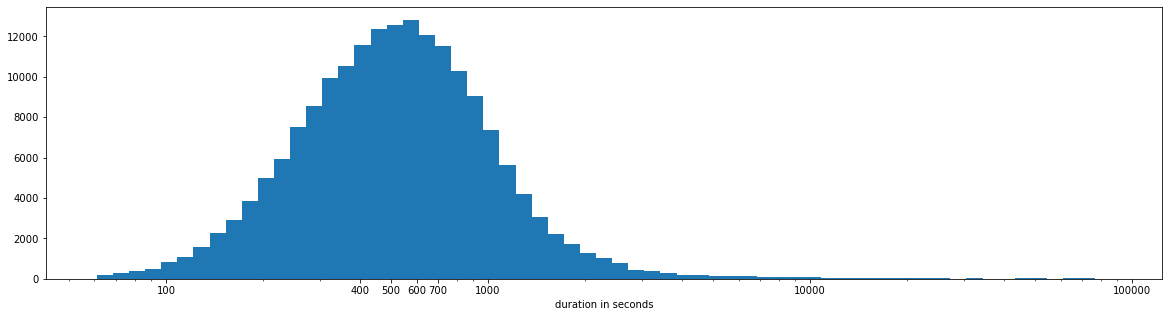

In [17]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(bike['duration_sec'].min()), np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)
ticks = [100,400,500,600,700,1000,10000,100000]
labels = [100,400,500,600,700,1000,10000,100000]
plt.figure(figsize=[20, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('duration in seconds')
plt.show()

Rides duration has a long-tailed distribution, When plotted on a log-scale, the duration distribution looks like a normal distribution with most of the rides having a duration of around 400 to 700 seconds

2) Riders Types  
> I'll be looking at the distribution of the 2nd variable of interest: Riders Types .

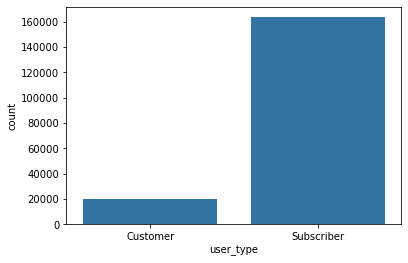

In [18]:
default_color = sb.color_palette()[0]
sb.countplot(data=bike, x='user_type', color = default_color);

In [19]:
len(bike[bike['user_type']=='Subscriber'])/len(bike['user_type'])

0.8916755719364055

So 89% of the riders are actually subscribers

3) Gender 
> I'll be looking at the distribution of the 3nd variable of interest: Gender  .

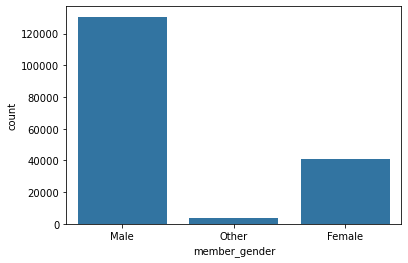

In [20]:
default_color = sb.color_palette()[0]
sb.countplot(data=bike, x='member_gender',color=default_color);

In [21]:
len(bike[bike['member_gender']=='Male'])/len(bike['member_gender'])

0.7123361612108259

So 71% of the riders are Males

4) Age 
> I'll be looking at the distribution of the 4th variable of interest: Age  .

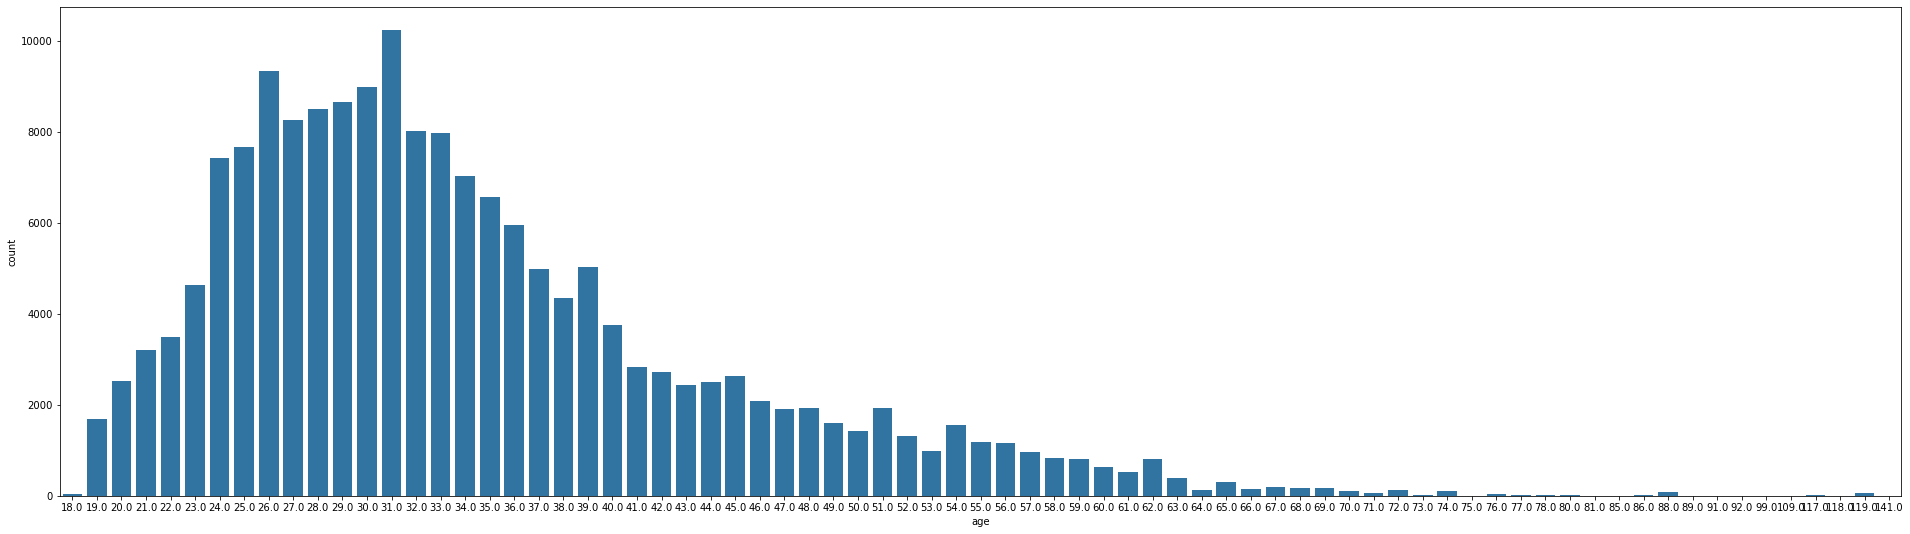

In [22]:
default_color = sb.color_palette()[0]
plt.figure(figsize=(33,9))
sb.countplot(data=bike, x='age',color=default_color,);

In [23]:
bike['age'].value_counts()

31.0     10236
26.0      9325
30.0      8972
29.0      8658
28.0      8498
         ...  
89.0         1
92.0         1
91.0         1
109.0        1
141.0        1
Name: age, Length: 75, dtype: int64

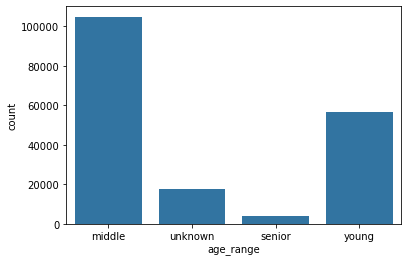

In [24]:
default_color = sb.color_palette()[0]
sb.countplot(data=bike, x='age_range',color=default_color,);

So most of the riders are in the middle age range, especially 26 to 31 years old

5) Start time  
> I'll be looking at the distribution of the 5th variable of interest: Start time  .

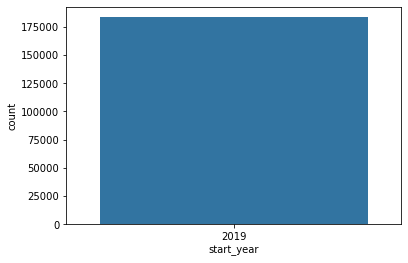

In [25]:
sb.countplot(data=bike, x='start_year');

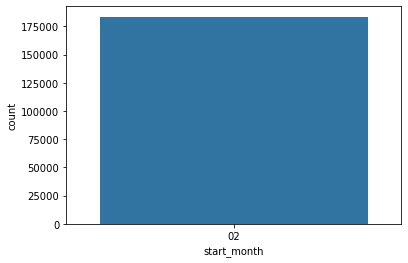

In [26]:
sb.countplot(data=bike, x='start_month');

So the data we have is for Feb 2019 only


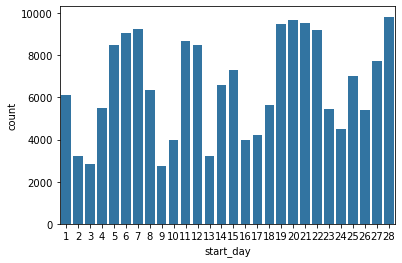

In [27]:
base_color = sb.color_palette()[0]
sb.countplot(data=bike, x='start_day',color=base_color);

So we have a clear difference in the usage pattern, weekends has less rides in general

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - Rides duration has a long-tailed distribution, When plotted on a log-scale, the duration distribution looks like a normal distribution with most of the rides having a duration of around 400 to 700 seconds

> - 89% of the riders are actually subscribers

> - 71% of the riders are Males

> - the data we have is for Feb 2019 only

> - we have a clear difference in the usage pattern, weekends has less rides in general

> - most of the riders are 26 to 31 years old

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I needed to seperate the start and end times into individual columns in order to process it further

> I needed to calculate the riders age from the year of birth

<a id = "Bivariate"> </a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

I will start by looking into the corelation between the numeric variables

In [28]:
numeric_vars = ['duration_sec', 'start_day', 'age','start_hour', 'end_hour']

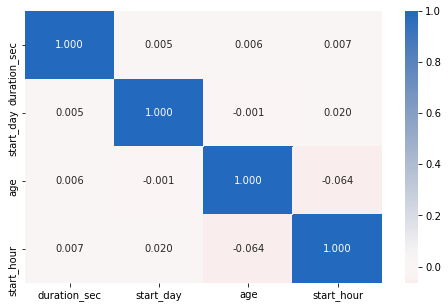

In [29]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

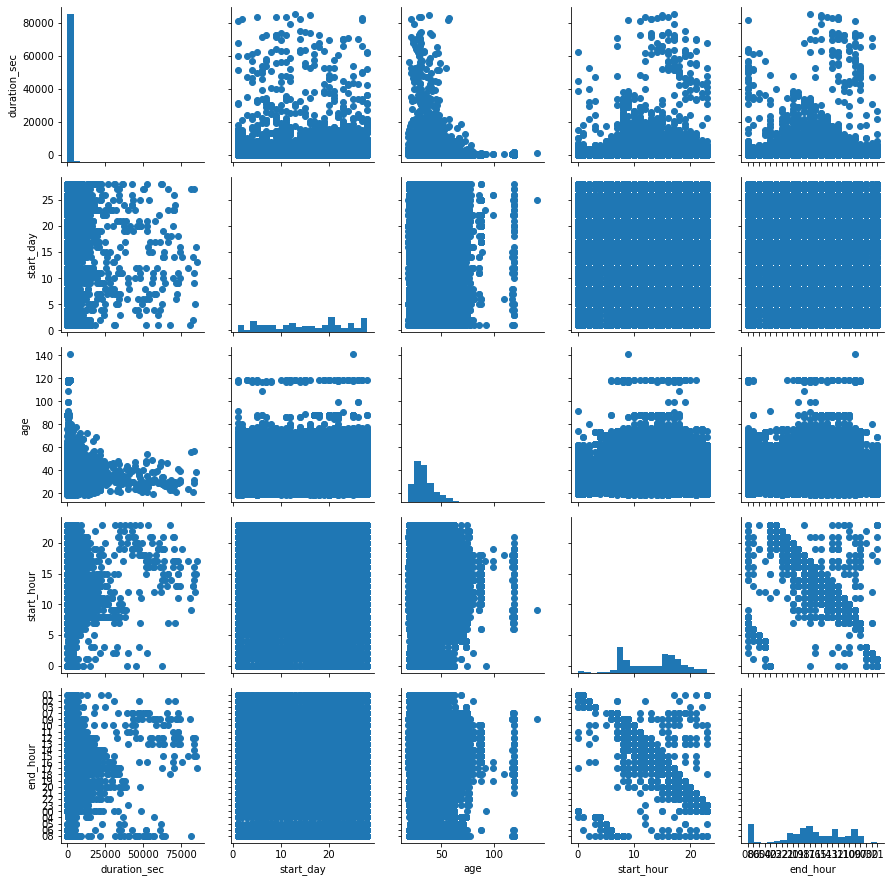

In [30]:
g = sb.PairGrid(data = bike, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

It can be noticed that there is a weak corelation beteen all the numeric variables in the data set

I will look now into the corelation between the numeric variables against the categorical variables 

In [31]:
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

<Figure size 720x720 with 0 Axes>

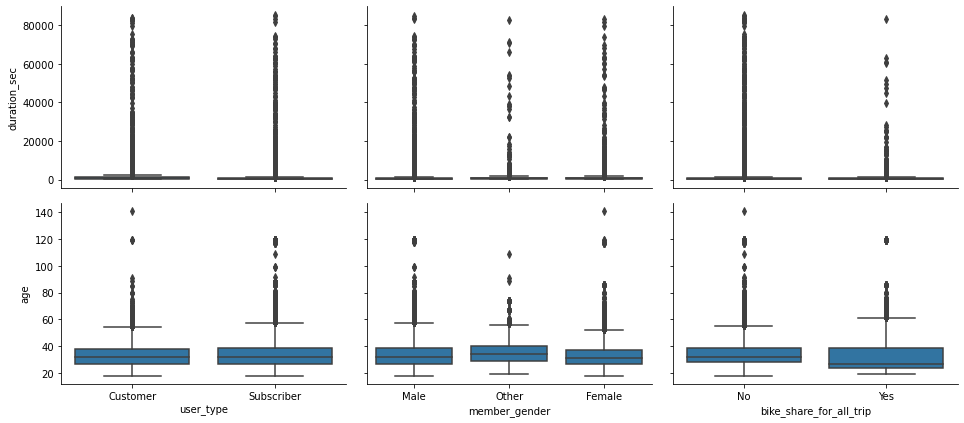

In [32]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bike, y_vars = ['duration_sec', 'age'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();


with so many outliers in both numeric values, we notice that there is not much of relationships between the categorical variables and the two numeric variables of interest.

Finally, let's look at relationships between the three categorical features.

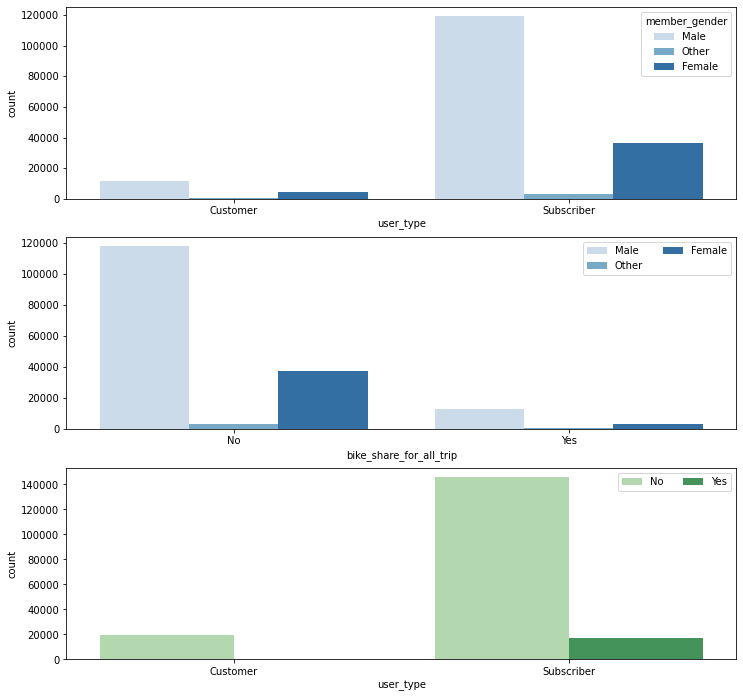

In [33]:
plt.figure(figsize = [12, 12])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: bike_share_for_all_trip vs. member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: user_type vs. bike_share_for_all_trip, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

So more male riders for both customer types and share types, all sharing riders are subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> looks like ride duration is not a function of gender or age or customer type

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> subscibers and males are a little olders than customers and females

<a id = "Multivariate"> </a>
## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures of user_type, member_gender, & age_range play into the relationship between day_type and duration_sec.

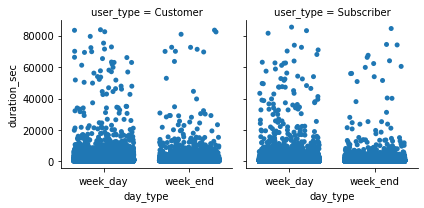

In [34]:
g = sb.FacetGrid(data = bike, col = 'user_type')
g.map(sb.stripplot, 'day_type', 'duration_sec', jitter = 0.35);

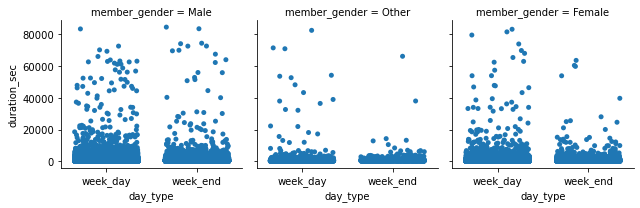

In [35]:
g = sb.FacetGrid(data = bike, col = 'member_gender')
g.map(sb.stripplot, 'day_type', 'duration_sec', jitter = 0.35);

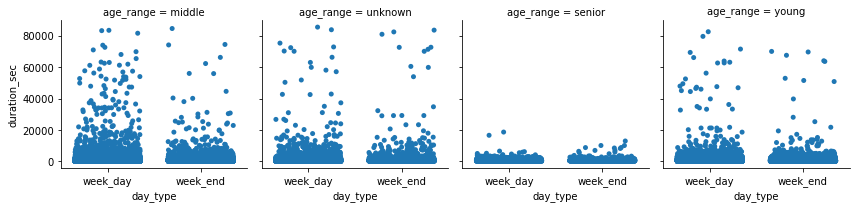

In [36]:
g = sb.FacetGrid(data = bike, col = 'age_range')
g.map(sb.stripplot, 'day_type', 'duration_sec', jitter = 0.35);

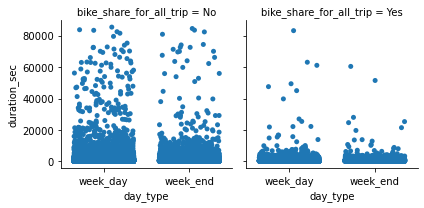

In [37]:
g = sb.FacetGrid(data = bike, col = 'bike_share_for_all_trip')
g.map(sb.stripplot, 'day_type', 'duration_sec', jitter = 0.35);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1) all riders tend to have less rides durations in weekends regardlessof the user type
> 2) all riders tend to have less rides durations in weekends, this is more clear in females more than males riders.
> 3) all riders tend to have less rides durations in weekends, this is more clear in middle and young aged riders.
> 4) bikers with share for all trip tend to have less rides duration on weekends.> 5)

### Were there any interesting or surprising interactions between features?

> it doesn't seem like there's a systematic interaction effect between the  categorical features